<a href="https://colab.research.google.com/github/karthikcs/machine-learning-coe/blob/master/diabetic-data/Diabetic_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysing Diabetic Data

Data analysis: https://github.com/karthikcs/machine-learning-coe/tree/master/diabetic-data

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/karthikcs/machine-learning-coe/master/diabetic-data/diabetes-patients-data.csv')
df.head()

,No. preg,Plasma Glucose,Dia BP,Triceps skin fold,Serum ins,BMI,Dia Pedigree,Age,Diabetic
0,6,148.0,72.0,35,155.54,33.6,0.627,50,1
1,1,85.0,66.0,29,155.54,26.6,0.351,31,0
2,8,183.0,64.0,23,155.54,23.3,0.672,32,1
3,1,89.0,66.0,23,94.00,28.1,0.167,21,0
4,0,137.0,40.0,35,168.00,43.1,2.288,33,1


In [ ]:
print('Number of records %d' % df.shape[0])
df.isna().sum()

Number of records 768


No. preg             0
Plasma Glucose       0
Dia BP               0
Triceps skin fold    0
Serum ins            0
BMI                  0
Dia Pedigree         0
Age                  0
Diabetic             0
dtype: int64

We can observe that there are no missing values in the Dataframe. Let us run simple stats

In [ ]:
df.describe()

,No. preg,Plasma Glucose,Dia BP,Triceps skin fold,Serum ins,BMI,Dia Pedigree,Age,Diabetic
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686849,72.404948,27.334635,155.544219,32.457357,0.471876,33.240885,0.348958
std,3.369578,30.435949,12.096346,9.229014,85.021108,6.875151,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.200000,23.000000,155.540000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,155.540000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


We can also observe that all the columns are numerical and continous values. We dont have any descrete values in this dataset

There are 8 feature columns. Let us see their distributions

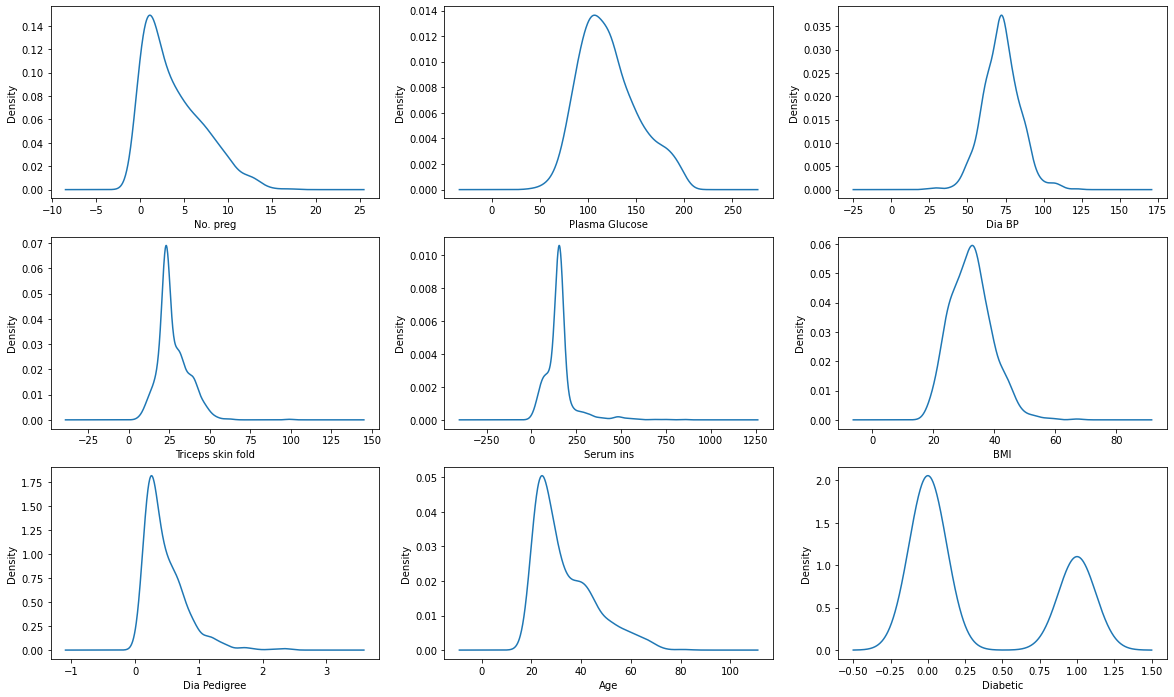

In [ ]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(20,12))

cols = df.columns

idx = 0
for col in cols:
  idx += 1
  a=fig.add_subplot(3, 3, idx)
  ax = df[col].plot.kde()
  ax.set_xlabel(col)


We can observe distribution of all the column values. Let us see the box plot and look for outliers

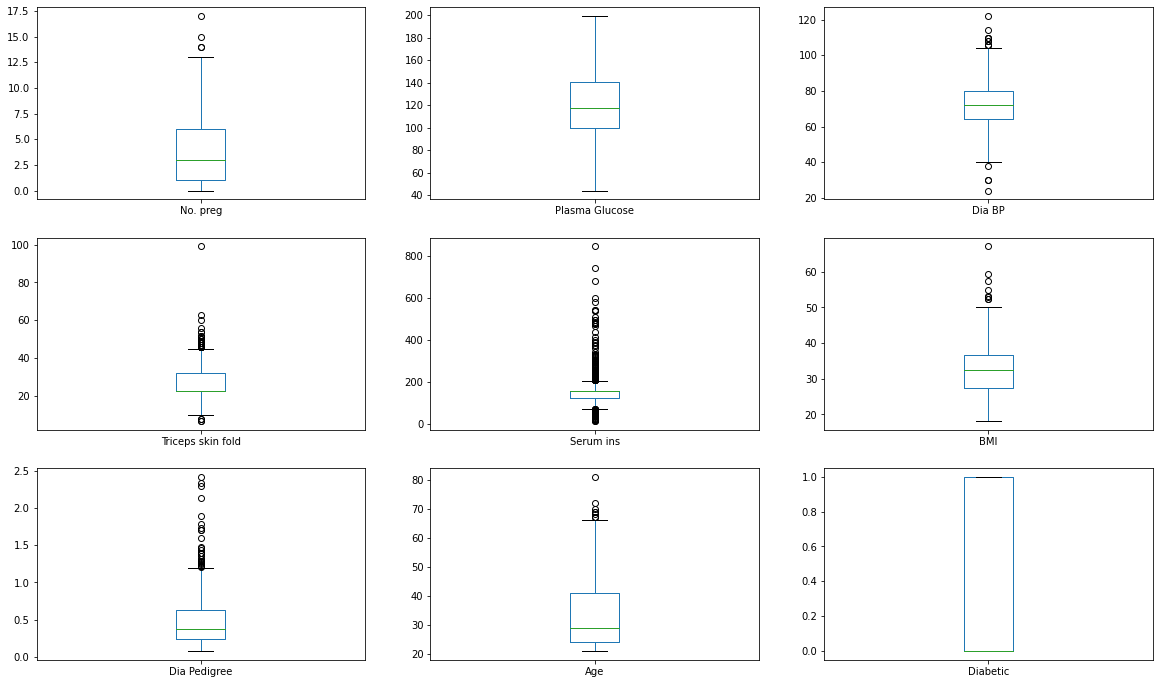

In [ ]:
fig = plt.figure(figsize=(20,12))
idx = 0
for col in cols:
  idx += 1
  a=fig.add_subplot(3, 3, idx)
  ax = df[col].plot.box()
  # ax.set_xlabel(col)


We can see there are quite a few outliers

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
corr = df.corr()
px.imshow(corr)
# px.imshow()
# corr
# fig = plt.figure()

fig = go.Figure(data=go.Heatmap(
    z=corr, x = corr.columns, y=corr.columns
    
))
fig.update_layout(
    autosize=False,
    width=500,
    height=500)
fig.show()
corr

,No. preg,Plasma Glucose,Dia BP,Triceps skin fold,Serum ins,BMI,Dia Pedigree,Age,Diabetic
No. preg,1.000000,0.127911,0.208524,0.032568,0.056019,0.021565,-0.033523,0.544341,0.221898
Plasma Glucose,0.127911,1.000000,0.218368,0.172404,0.420158,0.230950,0.137059,0.266532,0.492928
Dia BP,0.208524,0.218368,1.000000,0.147137,0.072510,0.281265,-0.002758,0.324599,0.166069
Triceps skin fold,0.032568,0.172404,0.147137,1.000000,0.150642,0.546528,0.142977,0.054514,0.189065
Serum ins,0.056019,0.420158,0.072510,0.150642,1.000000,0.166592,0.098642,0.136724,0.214409
BMI,0.021565,0.230950,0.281265,0.546528,0.166592,1.000000,0.153402,0.025523,0.311930
Dia Pedigree,-0.033523,0.137059,-0.002758,0.142977,0.098642,0.153402,1.000000,0.033561,0.173844
Age,0.544341,0.266532,0.324599,0.054514,0.136724,0.025523,0.033561,1.000000,0.238356
Diabetic,0.221898,0.492928,0.166069,0.189065,0.214409,0.311930,0.173844,0.238356,1.000000


Following correlations can be observed

- Age and number of 
- Plasma Glucose and Diabetic
- BMI and Triceps Skin fold thickness 
- Serum Insulin and Plasma Glucose
- BP and Age 

Now, let us plot graphs with scatter against Diabetic as color and see what we can observe

In [ ]:
df.groupby('Diabetic').mean()

,No. preg,Plasma Glucose,Dia BP,Triceps skin fold,Serum ins,BMI,Dia Pedigree,Age
Diabetic,,,,,,,,
0,3.298000,110.710200,70.935200,26.058000,142.206880,30.888300,0.429734,31.190000
1,4.865672,142.165672,75.147015,29.716418,180.427313,35.384701,0.550500,37.067164


The above table shows the mean values of Diabetic and non-Diabetic people

In [ ]:
px.scatter(df, x='Plasma Glucose', y='BMI', color='Diabetic', color_continuous_scale=px.colors.qualitative.Dark24)

In [ ]:
px.scatter(df, x='BMI', y='Triceps skin fold', color='Diabetic', color_continuous_scale=px.colors.qualitative.Dark24)